In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl 
from IPython.display import display
import os 

out_dir = "./plots"
in_dir = "./data"

# Violin Boxplots

In [2]:
# Plot results from the optimized algorithm
def create_violin_boxplot(df_data: pd.DataFrame, name: str, x: str, ax: plt.Axes|None=None, labels: list=list(), index: int=0, xlabel: str=None):
    colors = sns.color_palette()

    # Read in the data at the out_dir 
    optimized_measurement_data = list() 
    font = {'family' : 'serif', 'weight': 'normal', 'size': 9}

    sns.set_style("whitegrid")

    # Create subplots for each device
    if ax is None:
        fig, ax = plt.subplots(figsize=(5.9, 2))

    plt.subplots_adjust(hspace=0.0)

    i = 0

    y_offset = 0

    # device = measurement_df['device'].iloc[0]
    # dev_remote = measurement_df['dev_remote'].iloc[0]

    print(f"Plotting")

    color = colors[i]
    # measurement_df['y'] = y_offset

    sns.violinplot(x=x, data=df_data, ax=ax, inner=None, zorder=1, alpha=0.9, linewidth=0.8, log_scale=True, cut=0)
    #get all children of axes
    children1 = ax.get_children()
    for child in children1:
        child.set_alpha(0.9)

    sns.boxplot(x=x, data=df_data, ax=ax, linewidth=0.8, boxprops=dict(facecolor='white'), zorder=10, width=0.15, fliersize=5, flierprops={"marker": "|", "alpha": 0.3})
    # # again, get all children of axes.
    children2 = ax.get_children()
    # now those children which are in children2 but not in children1
    # must be part of the boxplot. Set zorder high for those.
    for child in children2:
        if not child in children1:
            child.set_zorder(10)

    ax.set_xlabel(None)
    # ax.set_ylabel(x)
    # ax.text(0, y_offset, device, va='center')
    # ax.set_yticklabels([])

    yticks = ax.get_yticks()
    yticklabels = ax.get_yticklabels()

    ax.set_yticks(yticks)
    print(yticks)
    if len(labels) > 0:
        label = labels[index]
        rotation = 0
        va = "baseline" 
        # if len(label) > 5:
        #     rotation = 90
        #     va = "center"

        print(f"Set tick label to: {labels[index]}")
        ax.set_yticklabels([labels[index]], fontdict=font, rotation=rotation, va=va)

    y_offset += 1
    i += 1

    # Get the current limits of the plot
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()    

    ax.set_xlabel(xlabel, fontdict=font)

    for spine in ax.spines.values():
        spine.set_visible(False)

    # Plot the border on the left side 
    # Plot the vertical line on the left side
    # ax.plot([xlim[0]+0.02, xlim[0]+0.02], ylim, color='black', linewidth=0.5)
    # # Plot the short horizontal lines at the top and bottom
    # ax.hlines(ylim[0]-0.006, xlim[0] + 0.02, xlim[0] + 0.2, color='black', linewidth=0.5)  # bottom line
    # ax.hlines(ylim[1]+0.006, xlim[0] + 0.02, xlim[0] + 0.2, color='black', linewidth=0.5)  # top line


    # ax.set_xlabel("Enhanced Measured Distance", fontdict=font, labelpad=5)
    plt.savefig(os.path.join(out_dir, f"{name}.pdf"), bbox_inches='tight', pad_inches=0.01)

def plot_multiple_violin(dataframes: list, plot_name: str, columns:list, labels: list,  xlabel:str=None):
    figsize = set_size(241)
    figsize = (figsize[0], len(dataframes) * 0.6)
    fig, axs = plt.subplots(len(dataframes) , 1, figsize=figsize, sharex=True, sharey='row')
    i = 0 
    for df_data in dataframes:
        create_violin_boxplot(df_data, plot_name, columns[i], axs[i], labels=labels, index=i, xlabel=xlabel)
        median, ci, mean = get_median_ci_mean(df_data, columns[i])
        print(f"Median {median}, CI {ci}, Mean {mean} for {labels[i]}")
        i += 1

In [3]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim


In [4]:
# Get median and 95% confidence interval and mean values 
def get_median_ci_mean(df: pd.DataFrame, column: str):
    median = df[column].median()
    ci = df[column].quantile(0.975) - df[column].quantile(0.025)
    mean = df[column].mean()
    return median, ci, mean


Duration until a notification is sent
Median, 95%, Mean (722.1166666666667, 194648.25000000003, 23261.502005974813)
Plotting
[0]
Set tick label to: Tile
Median 4413.883333333333, CI 230843.27416666722, Mean 32564.45191828439 for Tile
Plotting
[0]
Set tick label to: Chipolo
Median 249.44166666666666, CI 25573.199166666665, Mean 3349.725555219669 for Chipolo
Plotting
[0]
Set tick label to: AirTag
Median 360.3333333333333, CI 1135.6666666666665, Mean 611.4579851797179 for AirTag
Plotting
[0]
Set tick label to: Find My
Median 823.0833333333333, CI 79726.00874999998, Mean 12544.511140719333 for Find My
Plotting
[0]
Set tick label to: SmartTag
Median 70.24166666666666, CI 1055.8979166666647, Mean 421.8609268982229 for SmartTag
Number of notifications per device
Median, 95%, Mean (1.0, 44.69999999999982, 6.284493284493284)
Number of beacons before the first notification
Median, 95%, Mean (6.0, 159.0999999999999, 23.217774600905408)


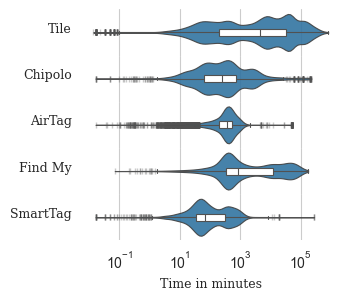

In [8]:
# Import the data 
print("Duration until a notification is sent")
df_avg_duration = pd.read_csv(f"{in_dir}/Avg. of duration from first beacon to notification-data-2023-11-24 16 15 16.csv")
df_avg_duration["duration_min"] = df_avg_duration["duration_sec"] / 60
df_avg_duration["duration_h"] = df_avg_duration["duration_min"] / 60
df_avg_duration["duration_d"] = df_avg_duration["duration_h"] / 24
df_avg_duration = df_avg_duration.dropna()
df_avg_duration = df_avg_duration[df_avg_duration["duration_min"] > 0]
print(f"Median, 95%, Mean {get_median_ci_mean(df_avg_duration, 'duration_min')}")

#filter if deviceType contains tile, chipolo, airtag, find my, smart
df_avg_duration_tile = df_avg_duration[df_avg_duration["deviceType"].str.lower().str.contains("tile") == True] 
df_avg_duration_chipolo = df_avg_duration[df_avg_duration["deviceType"].str.lower().str.contains("chipolo") == True]
df_avg_duration_airtag = df_avg_duration[df_avg_duration["deviceType"].str.lower().str.contains("airtag") == True]
df_avg_duration_find_my = df_avg_duration[df_avg_duration["deviceType"].str.lower().str.contains("find") == True]
df_avg_samsung = df_avg_duration[df_avg_duration["deviceType"].str.lower().str.contains("smart") == True]

# Create a plot with all device types 
plot_multiple_violin([df_avg_duration_tile, df_avg_duration_chipolo, df_avg_duration_airtag, df_avg_duration_find_my, df_avg_samsung], "duration_notification_min", ["duration_min", "duration_min", "duration_min", "duration_min", "duration_min"], ["Tile", "Chipolo", "AirTag", "Find My", "SmartTag"], xlabel="Time in minutes")

print("Number of notifications per device")
df_notifications_per_device = pd.read_csv(f"{in_dir}/Avg. no. of notifications per device-data-2023-11-24 16 16 51.csv")
# create_violin_boxplot(df_notifications_per_device, "notifications_per_device",x="notification_count")
print(f"Median, 95%, Mean {get_median_ci_mean(df_notifications_per_device, 'notification_count')}")

print("Number of beacons before the first notification")
df_beacon_for_notification = pd.read_csv(f"{in_dir}/Avg. of beacons for the first notification-data-2023-11-24 16 19 18.csv")
# Remove all nan values
df_beacon_for_notification = df_beacon_for_notification.dropna()
df_beacon_for_notification = df_beacon_for_notification[df_beacon_for_notification["beacon_count_before_first_notification"] > 0]
# create_violin_boxplot(df_beacon_for_notification, "beacons_for_notification", x="beacon_count_before_first_notification")
print(f"Median, 95%, Mean {get_median_ci_mean(df_beacon_for_notification, 'beacon_count_before_first_notification')}")

# plot_multiple_violin([df_avg_duration, df_notifications_per_device, df_beacon_for_notification], "combined", ["duration_min", "notification_count", "beacon_count_before_first_notification"], ["(a)", "(b)", "(c)"])

In [10]:
# We want to calculate the average number of notifications for each device type
df_notifications = pd.read_csv(f"{in_dir}/notifications.csv")
df_false_alarms = df_notifications[df_notifications["falseAlarm"] == True]
# remove false_alarm
df_notifications = df_notifications[df_notifications["falseAlarm"] == False]
# remove apple devices 
df_notifications = df_notifications[~df_notifications["device_type"].str.lower().str.contains("apple")]
# print(f"Notifications: {df_notifications.head()}")
# Count the number of notifications for each device type 
df_notification_count = df_notifications.groupby("device_type").count()
df_notification_count["count"] = df_notification_count["id"]
print(f"Number of notifications per device type:\n{df_notification_count['count']}")
df_notification_count["average_per_day"] = df_notification_count["count"] / 14
print(f"Average number of notifications per day:\n{df_notification_count['average_per_day']}")

# Get the number of notifications per day for each device type
# Group the devices by day and count the number of notifications
df_notifications["date"] = pd.to_datetime(df_notifications["createdAt"])
df_notifications["date"] = df_notifications["date"].dt.date
df_notifications_per_day = df_notifications.groupby(["device_type", "date"]).count()
# Average per day 
df_notifications_per_day_mean = df_notifications_per_day.groupby("device_type").mean()
# Median per day 
df_notifications_per_day_median = df_notifications_per_day.groupby("device_type").median()
print(f"Average per day: {df_notifications_per_day_mean['id']}")
print(f"Median per day: {df_notifications_per_day_median['id']}")


Number of notifications per device type:
device_type
AirPods               396
AirTag               2232
Chipolo               248
Find My              1442
Samsung SmartTag      536
Tile                13350
Name: count, dtype: int64
Average number of notifications per day:
device_type
AirPods              28.285714
AirTag              159.428571
Chipolo              17.714286
Find My             103.000000
Samsung SmartTag     38.285714
Tile                953.571429
Name: average_per_day, dtype: float64
Average per day: device_type
AirPods              28.285714
AirTag              159.428571
Chipolo              17.714286
Find My             103.000000
Samsung SmartTag     38.285714
Tile                953.571429
Name: id, dtype: float64
Median per day: device_type
AirPods              26.5
AirTag              159.5
Chipolo              20.0
Find My             100.0
Samsung SmartTag     38.5
Tile                947.0
Name: id, dtype: float64


In [11]:
# Find out which trackers have been marked with a feedback_id
df_feedback = df_notifications[df_notifications["feedback_id"].notna()] 
# Filter only for device_type, location, feedback_id, device_id
df_feedback = df_feedback[["device_type", "location", "feedback_id", "device_id"]]
print(f"Feedback:\n{df_feedback}")

# Calculate percentage of each tracker type 
df_device_type = df_feedback.groupby("device_type").count()
df_device_type["percentage"] = df_device_type["device_id"] / df_device_type["device_id"].sum() * 100
print(f"Percentage of each device type:\n{df_device_type['percentage']}")

Feedback:
      device_type  location  feedback_id  device_id
83           Tile  Backpack       7161.0   18340836
260        AirTag       Car       7173.0   18384528
307          Tile       Car       7175.0   19706346
311        AirTag       Car       7177.0   19706349
2172         Tile       Car       7249.0   22714864
7201       AirTag       Car       7325.0   24972347
9656         Tile  Backpack       7345.0   21782481
11517      AirTag       Car       7351.0   26690013
12669      AirTag       Car       7359.0   26822332
14996      AirTag       Car       7375.0   27831470
15466      AirTag       Car       7381.0   27777912
17383        Tile       Car       7393.0   28367422
Percentage of each device type:
device_type
AirTag    58.333333
Tile      41.666667
Name: percentage, dtype: float64
